In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


In [2]:
with open ("data/pickle_files/peace_originators_2cats_clean.pickle", "rb") as f:
    disp_mat_trade = pickle.load(f)

In [3]:
with open("data/pickle_files/peace_originators_2cats_split.pickle", "rb") as f:
    pickle_object = pickle.load(f)

In [4]:
X_train = pickle_object[0]
X_test = pickle_object[1]
y_train = pickle_object[2]
y_test = pickle_object[3]

In [5]:
rf = RandomForestClassifier(n_estimators=300, max_features=1, max_depth=5, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [6]:
rf.score(X_train, y_train)

0.6706207987346777

In [7]:
rf.score(X_test, y_test)

0.6230414746543779

In [25]:
feature_viewer = {}
for col, score in zip(disp_mat_trade.loc[:,'milex':'exports'].columns, rf.feature_importances_):
    feature_viewer[col] = score
features = pd.Series(feature_viewer)
features

milex      0.114388
milper     0.102913
irst       0.100373
pec        0.092835
tpop       0.099868
upop       0.094412
cinc       0.092252
imports    0.154911
exports    0.148048
dtype: float64

Text(0,0.5,'Feature')

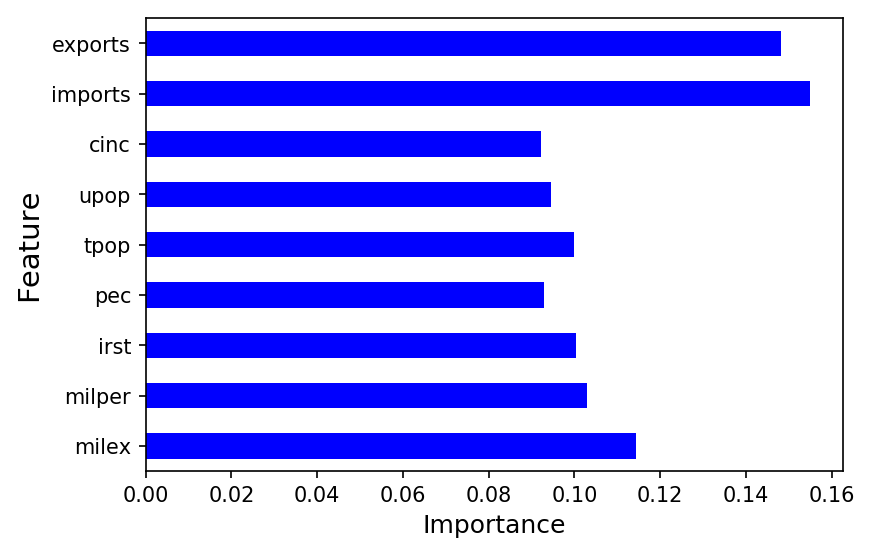

In [32]:
plt.figure(dpi = 150)
features.plot.barh(color='b')
plt.xlabel('Importance', size=12)
plt.ylabel('Feature', size=14)

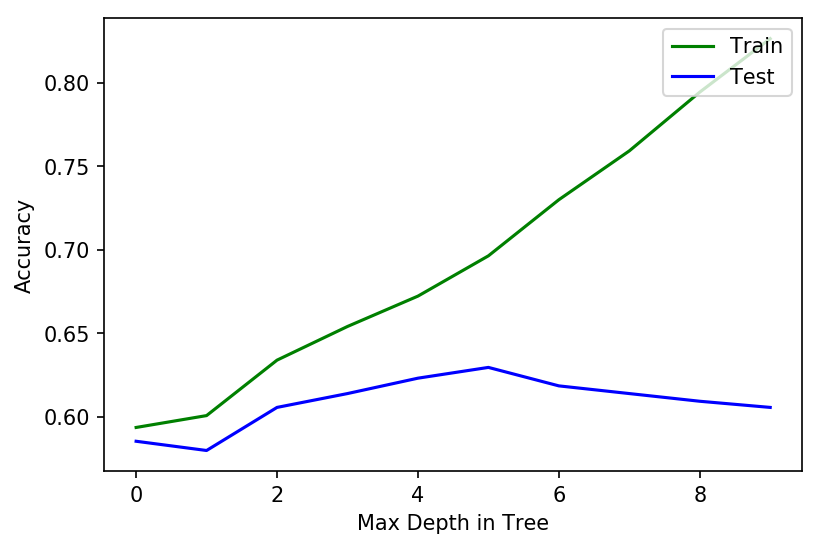

In [9]:
train_score = []
test_score = []

for depth in range(1,11):
    dt = RandomForestClassifier(n_estimators=300, max_depth=depth, max_features=1)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=150)
plt.plot(range(10), train_score, 'g', label="Train")
plt.plot(range(10), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

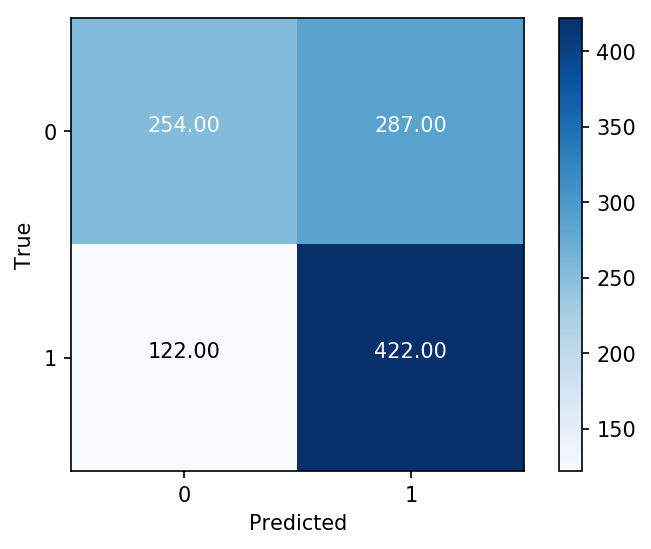

In [10]:
plt.figure(dpi=150)
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar();
plt.xticks([0,1])
plt.yticks([0, 1]);
plt.ylabel("True")
plt.xlabel("Predicted");
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [11]:
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.68      0.47      0.55       541
          1       0.60      0.78      0.67       544

avg / total       0.64      0.62      0.61      1085



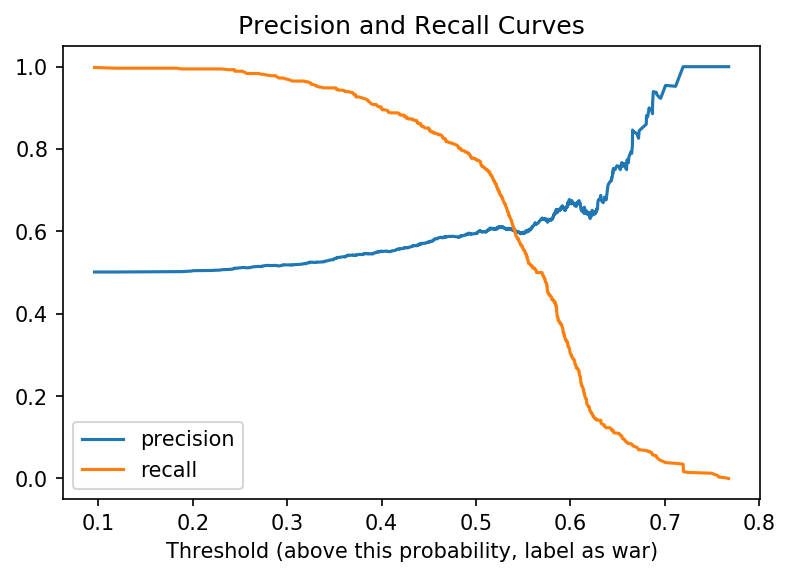

In [12]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1] )

plt.figure(dpi=150)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as war)');
plt.title('Precision and Recall Curves');

In [13]:
with open("my_model.pkl", "wb") as f:
    pickle.dump(rf, f)